C:\Users\Pranay Ramteke\AppData\Local\Temp\ipykernel_17112\2874164926.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='rocket')


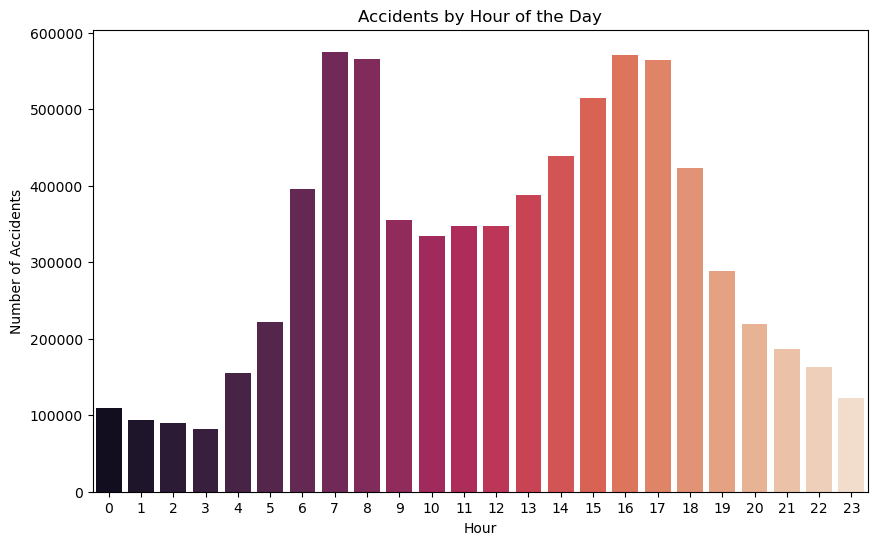

C:\Users\Pranay Ramteke\AppData\Local\Temp\ipykernel_17112\2874164926.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weekday', data=df, order=order, palette='coolwarm')


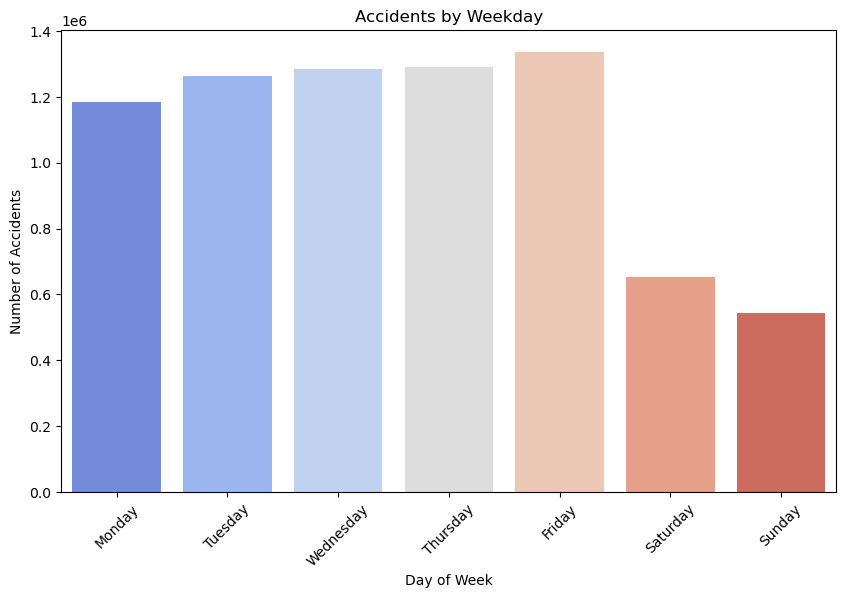

C:\Users\Pranay Ramteke\AppData\Local\Temp\ipykernel_17112\2874164926.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Weather_Condition'].isin(top_weather)],


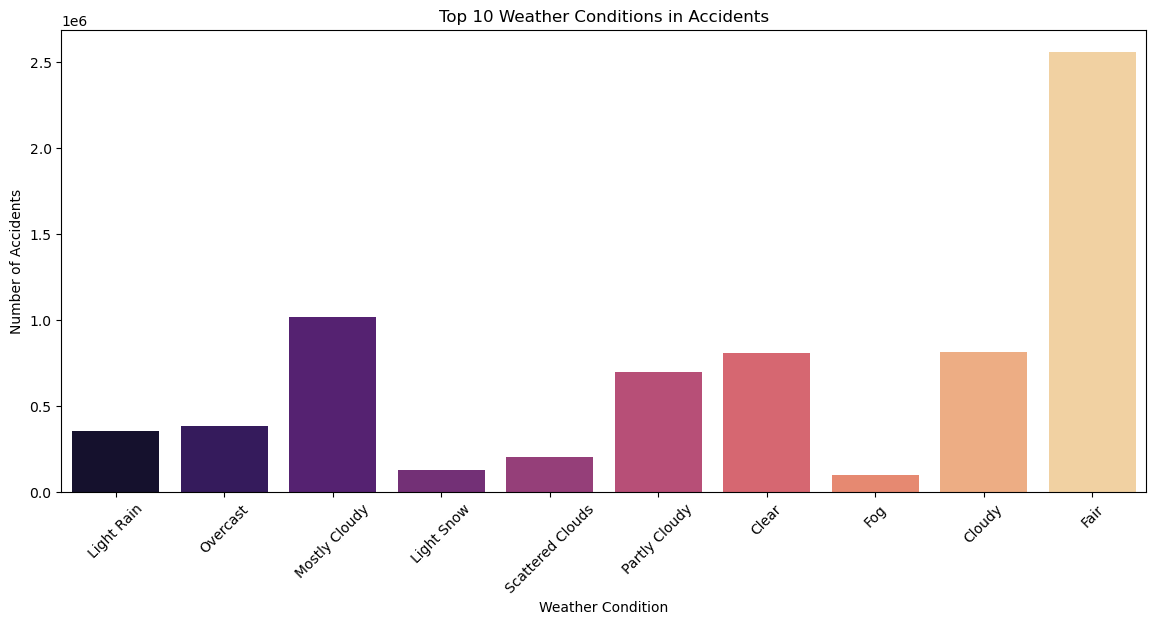

Heatmap saved as 'accident_heatmap.html'


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Load dataset (adjust the path to your actual CSV file)
df = pd.read_csv("US_Accidents.csv")

# Drop rows with missing essential values
df.dropna(subset=['Start_Lat', 'Start_Lng', 'Start_Time', 'Weather_Condition'], inplace=True)

# Convert 'Start_Time' to datetime using robust mixed format
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')

# Extract useful time features
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()

# --- Visualization Section ---

# 1. Accidents by Hour
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df, palette='rocket')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()

# 2. Accidents by Weekday
plt.figure(figsize=(10, 6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='Weekday', data=df, order=order, palette='coolwarm')
plt.title('Accidents by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# 3. Weather Conditions Leading to Accidents
plt.figure(figsize=(14, 6))
top_weather = df['Weather_Condition'].value_counts().nlargest(10).index
sns.countplot(data=df[df['Weather_Condition'].isin(top_weather)], 
              x='Weather_Condition', palette='magma')
plt.title('Top 10 Weather Conditions in Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# 4. Heatmap of Accidents (Sample 5000 points for performance)
map_center = [df['Start_Lat'].mean(), df['Start_Lng'].mean()]
base_map = folium.Map(location=map_center, zoom_start=5)

heat_data = df[['Start_Lat', 'Start_Lng']].dropna().sample(5000).values.tolist()
HeatMap(heat_data).add_to(base_map)

# Save and show the map
base_map.save("accident_heatmap.html")
print("Heatmap saved as 'accident_heatmap.html'")
